### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


---

# Grade: /100 Mark(s)

# Assignment 2: Maximum Likelihood and Probabilities

### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.


In [1]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
np.random.seed(1654)


---

### Question 1: /5 Marks

The negative log likelihood for a Poisson random variable is

$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$.

(_Try your hands at home trying to arrive at this starting off from the original PMF_)

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood. The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y!)$ in your function.

Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])` (it should give 4.4).

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and `y=np.array([2,1,0,0])`?

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why?


#### Written Answer:

When $\lambda$ is set to 0 or a negative number, the log function becomes undefined or returns a complex number because the logarithm of zero or negative numbers is not defined within the real numbers. This leads to a computational error or nonsensical output. In the context of the Poisson distribution, $\lambda$ represents the average rate at which events occur in a fixed interval. As such, it must be a positive number. Setting $\lambda$ to 0 or a negative value violates the basic assumptions of the Poisson distribution and is thus not meaningful in this context.


In [2]:

def poissonNegLogLikelihood(lam, y):
    lam = np.array(lam)
    
    # Compute the negative log likelihood
    neg_log_likelihood = -np.sum(y * np.log(lam) - lam)
    return neg_log_likelihood

# Test 1
lam = 1.3
y = np.array([2, 1, 0, 0])
test1_result = poissonNegLogLikelihood(lam, y)

# Test 2
lam_array = np.array([1, 0.5, 1, 3])
test2_result = poissonNegLogLikelihood(lam_array, y)

test1_result, test2_result


(4.412907206597527, 6.193147180559945)

---

### Question 2: /8 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with

- `b=np.array([1,2])`
- `X=np.array([[1,2,3],[2,3,1]]).T`
- `y=np.array([0,2,10])`

(It should give 3211.8)


In [3]:
def poissonRegressionNegLogLikelihood(b, X, y):
    # Calculate lambda as exp(Xb)
    lam = np.exp(X @ b)
    # Utilize the poissonNegLogLikelihood function for the calculated lambda and y
    neg_log_likelihood = poissonNegLogLikelihood(lam, y)
    return neg_log_likelihood

# Test parameters
b = np.array([1, 2])
X = np.array([[1, 2, 3], [2, 3, 1]]).T
y = np.array([0, 2, 10])

# Test the function
test_result = poissonRegressionNegLogLikelihood(b, X, y)
test_result


3211.7843052468816

---

### Question 3: /6 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$? Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?


#### Written Answer:

a) The exponential function is applied to $\mathbf{X}\beta$ in poissonRegressionNegLogLikelihood to ensure that the parameter $\lambda$ for the Poisson distribution is always positive. The exponential function, $\exp(x)$, has the property of mapping any real number input to a positive output ($\exp(x) > 0$ for all $x \in \mathbb{R}$). This characteristic is crucial for the Poisson distribution, where $\lambda$ represents the rate parameter or the expected number of events in a given interval, which cannot be negative or zero. By using the exponential transformation, we ensure that regardless of the values of $\mathbf{X}$ and $\beta$, the resulting $\lambda$ will always be a valid, positive rate parameter for the Poisson distribution.

b) Had we just passed $\lambda = \mathbf{X}\beta$ directly without the exponential transformation, there would have been several potential issues:

Negative Rates: Since linear combinations (such as $\mathbf{X}\beta$) can yield any real value, including negative numbers, directly using $\mathbf{X}\beta$ as $\lambda$ could result in negative rate parameters. Negative rates are not valid in the context of a Poisson distribution, as they do not make sense for counting processes or events occurring.

Zero Rates: Similarly, it's possible for $\mathbf{X}\beta$ to be zero, especially if the linear predictor exactly cancels out. A zero rate parameter ($\lambda = 0$) would imply that no events are ever expected to occur, which may be unrealistic in many practical scenarios and would severely limit the model's applicability.

Invalid Logarithm Values: The log likelihood calculation involves taking the logarithm of $\lambda$. If $\lambda$ could be zero or negative (as could happen with a direct $\mathbf{X}\beta$ assignment), it would lead to undefined or complex numbers in the log likelihood computation, breaking the model fitting process.


---

### Question 4: /4 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$. The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$.

Hint: Numpy implements the exponential using `np.exp`.

Test your function by calling it with

- `b=np.array([1,2])`
- `X=np.array([[1,2,3],[2,3,1]]).T`

(It should give [ 148.41 , 2980.96, 148.4])


In [4]:

def modelPrediction(b, X):
    # Calculate the predicted values
    y_hat = np.exp(X @ b)
    return y_hat

# Test parameters
b = np.array([1, 2])
X = np.array([[1, 2, 3], [2, 3, 1]]).T

# Test the function
predictions = modelPrediction(b, X)
predictions


array([ 148.4131591 , 2980.95798704,  148.4131591 ])

---

### Question 5: /14 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcome counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with

- `X=np.array([[1,2,3],[2,3,1]]).T`
- `y=np.array([0,2,10])`

What is your estimated b?


In [5]:

def fitModel(X, y):
    # Initial guess for the coefficients
    initial_guess = np.zeros(X.shape[1])
    
    # Objective function to minimize
    def objective(b):
        return poissonRegressionNegLogLikelihood(b, X, y)
    
    # Perform the optimization
    result = minimize(objective, initial_guess)
    
    # Return the estimated coefficients
    return result.x

# Test parameters
X = np.array([[1, 2, 3], [2, 3, 1]]).T
y = np.array([0, 2, 10])

# Fit the model and get estimated coefficients
estimated_b = fitModel(X, y)
estimated_b


array([ 0.94827556, -0.5295352 ])

---

### Question 6: /14 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above. Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.


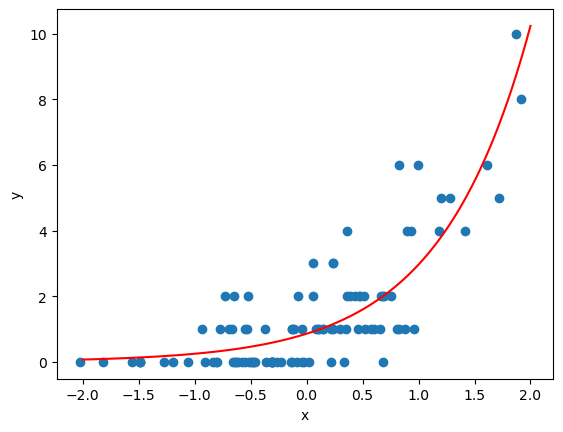

In [6]:
# Load the data
data = pd.read_csv('poisson_regression_data.csv')

# Plot the data
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')

# Fit the model
X = np.c_[np.ones(data.shape[0]), data['x']]
y = data['y']
b = fitModel(X, y)

# Plot the model predictions
x_vals = np.linspace(-2, 2, 100)
X_vals = np.c_[np.ones(100), x_vals]
y_vals = modelPrediction(b, X_vals)
plt.plot(x_vals, y_vals, color='red')
plt.show()


---

### Question 7: /14 Marks

We wish to do an experiment to determine if ants search for food using a random search or directed search method. To help design the experiment we first will run some simulations. In the experiment, ants are placed inside a 50 mm $\times$ 50 mm box. They cannot climb the wall, but can escape through an opening of size 10 mm in the wall. Repeated measurements of how far an ant travels in 1 second show an average speed of 2 mm per second. Our simulation needs to determine the probability that an ant escapes the box in 600 seconds (hint: so your main iteration would look like `for t in range(600):`) if their motion is indeed random. Assume the ant is always initially placed in the center of the box and simulate a simple random walk in 2D on discrete time in this fashion: Have the ant live on a discrete lattice. The ant takes 2 mm to the left if a random number $u$ satisfies $u < 0.25$. The ant moves 2 mm to the right if $0.25 \leq u < 0.5$, the ant moves 2 mm up if $0.5 \leq u < 0.75$, and 2 mm down if $0.75 \leq u \leq 1.0$. $u$ is distributed uniformly between 0 and 1 (hint: use `np.random.uniform(low=0, high=1)` to generate it). If a step would take the ant into a wall, repeat the step until it is successful (result is still one time-step). With `attempts = np.linspace(10, 1000, 19)`, run your main iteration under the loop `for M in attempts:` and construct a dataframe with columns for number of attempts (i.e. `M`), number of escapes, and probability of escape for every `M`. Your dataframe would eventually look something like this with 19 rows and real values:

| attempts | escapes | probability |
| -------- | ------- | ----------- |
| 10       | x1      | y1          |
| 65       | x2      | y2          |
| ...      | ...     | ...         |
| 1000     | x19     | y19         |


In [7]:
attempts = np.linspace(10, 1000, 19)

x    = 50       # box width in x-direction 
y    = 50       # box height in y-direction
time = 600      # in seconds

# coordinate of one arbitrary opening of size 10x1
x_open = [5, 15]
y_open = y-1

# distance in millimeters that the ant travels per second
delta  = 2

number_of_attempts = np.zeros([0])
number_of_escapes = np.zeros([0])

for M in attempts:

    escape = 0
    for trial in range(int(M)):

        # initialize X and Y coordinates for the ant
        X = np.zeros([time])
        Y = np.zeros([time])

        # ant's initial location centered in the box
        x_ant = x/2
        y_ant = y/2

        i = -1

        # main loop for the ant's movement
        for t in range(time):
            
            # generate a random number
            u = np.random.uniform(low=0.0, high=1.0)

            # move the ant
            if ( u < 0.25 ):
                x_ant = x_ant - delta
            if ( u >= 0.25 ) & ( u < 0.5 ):
                x_ant = x_ant + delta
            if ( u >= 0.5 )  & ( u < 0.75 ):
                y_ant = y_ant + delta
            if ( u >= 0.75 ) & ( u <= 1 ):
                y_ant = y_ant - delta

            # store the ant's location
            if (x_ant > 0) & (x_ant < x) & (y_ant > 0) & (y_ant < y):
                i += 1
                X[i] = x_ant
                Y[i] = y_ant
                x_ant_pre = x_ant
                y_ant_pre = y_ant
            else:
                
                # if a wall is hit keep producing random numbers until the ant is inside the box
                while (x_ant <= 0) | (x_ant >= x) | (y_ant <= 0) | (y_ant >= y):
                    u = np.random.uniform(low=0.0, high=1.0) 

                    # move the ant
                    if ( u < 0.25 ):
                        x_ant = x_ant_pre - delta
                    if ( u >= 0.25 ) & ( u < 0.5 ):
                        x_ant = x_ant_pre + delta
                    if ( u >= 0.5 ) & ( u < 0.75 ):
                        y_ant = y_ant_pre + delta
                    if ( u >= 0.75 ) & ( u <= 1 ):
                        y_ant = y_ant_pre - delta

                i += 1  # store the ant's location
                X[i] = x_ant
                Y[i] = y_ant

            # check if the ant escapes through the opening
            if (X[i] >= x_open[0]) & (X[i] <= x_open[-1]) & (Y[i] == y_open):
                escape += 1
                X_plot = X; Y_plot = Y # store the ant's location when it escapes
                break

    # store the number of attempts and escapes
    number_of_attempts = np.append(number_of_attempts, np.array([M]))  
    number_of_escapes = np.append(number_of_escapes, np.array([int(escape)]))

# create a pandas dataframe to store the data
df_attempts = pd.DataFrame({"attempts": pd.Series(number_of_attempts)})
df_escapes = pd.DataFrame({"escapes": pd.Series(number_of_escapes)})
df_probability = pd.DataFrame({"probability": pd.Series(np.divide(number_of_escapes,number_of_attempts))})

# display the first and last few rows of the data
ant = pd.concat([df_attempts, df_escapes, df_probability], axis=1)
display(ant.head())
display(ant.tail())


,attempts,escapes,probability
0,10.0,5.0,0.500000
1,65.0,14.0,0.215385
2,120.0,48.0,0.400000
3,175.0,47.0,0.268571
4,230.0,61.0,0.265217


,attempts,escapes,probability
14,780.0,205.0,0.262821
15,835.0,217.0,0.259880
16,890.0,226.0,0.253933
17,945.0,264.0,0.279365
18,1000.0,256.0,0.256000


---

### Question 8: /5 Marks

Plot the trajectory of the ant in the last escape event.


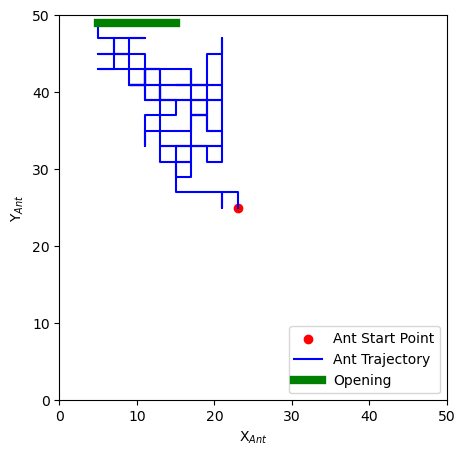

In [8]:
# Let's visualize the last escape event
plt.figure(figsize=(5,5))
X_plot[ X_plot==0 ] = np.nan
Y_plot[ Y_plot==0 ] = np.nan
plt.scatter(X_plot[0], Y_plot[0], c='red', label="Ant Start Point")
plt.plot(X_plot,Y_plot, c='b', label="Ant Trajectory")
plt.plot(x_open, [y_open,y_open], 'g', label="Opening", linewidth=6)
plt.xlabel("X$_{Ant}$")
plt.ylabel("Y$_{Ant}$")
plt.xlim([0,x])
plt.ylim([0,y])
plt.legend(loc="lower right")
plt.show()


---

### Question 9: /5 Mark(s)

Explore the "ant" dataframe. Do you see any trend in probability? What value for probability would you report if you are asked what is the probability of the escape event?


Probability of escape event about 26.2%.



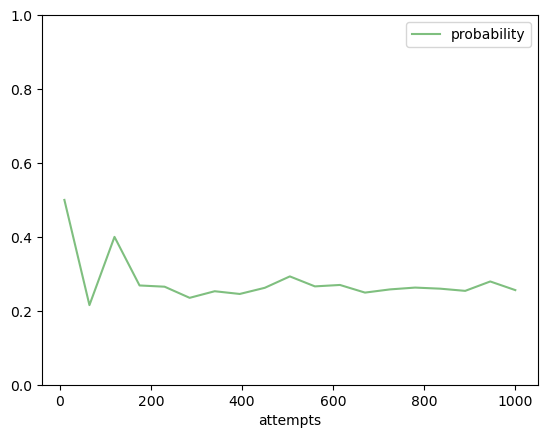

In [9]:
fig, ax = plt.subplots(dpi = 100)
ant.plot.line('attempts','probability', ax = ax, alpha = 0.5, c='g')
ax.set_ylim([0,1])
print("Probability of escape event about {}%.\n".format((ant.probability.tail(5).mean()*100).round(1)))


#### Written Answer:

as the number of attempts goes up the probability remains around 26%


---

### Question 10: /5 Mark(s)

Now scatter plot `attempts` versus `escapes` and use what you have learned so far to apply linear regression (ordinary least squares) to the data, and plot the predictions over the same range. Report your fit coefficients and compare them against your answer to the previous question and report what you witness and explain why?


[0.26]


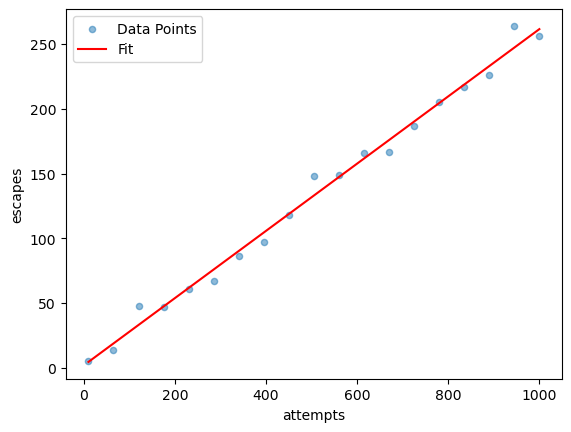

In [10]:

from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(dpi = 100)
ant.plot.scatter('attempts','escapes', ax = ax, alpha = 0.5, label='Data Points')

x = ant.attempts.values
X = x.reshape(-1,1)
y = ant.escapes.values

ols_fit = LinearRegression().fit(X, y)
print(ols_fit.coef_.round(2))

newx = np.linspace(x.min(),x.max(),1001)
newX = newx.reshape(-1,1)
y_predicted_ols = ols_fit.predict(newX)

ax.plot(newx, y_predicted_ols, color = 'red', label='Fit')
plt.legend()
plt.show()


#### Written Answer:

y intercept is 0 because no escapes can happen without any attempts. the coefficient or slope is the same as probability of escape event because this is a linear relationship between escapes and attempts and the probability of escape remains the same for all attempts.


---

### Question 11: /8 Mark(s)

You gain 2 dollars every time the ant escapes, otherwise you loose a dollar. What would be the expected value of the bet and how would you interpret it?


#### Written Answer:

X = {escape, stay}

$P(X=escape)=0.26$

$P(X=stay)= 1-0.26 = 0.74$

$E(X)=\sum x P(X=x) = (2\times0.26)+(-1\times0.74)=-0.22$

if i bet an infinite number of times the average outcome is losing 22 cents every time I bet


---

### Question 12: /12 Mark(s)

This question is totally independent of the previous questions. The joint probability density function (PDF) of $X$ and $Y$ is given by the following function:

$f_{X,Y}(x,y)=\begin{cases}
    e^{-(\frac{x}{y}+y)}y^{-1}& \text{if }\;\;0<x,\;y<\infty,\\
    0              & \text{otherwise.}
\end{cases}
$

For $y>0$, find:

**A)** $P(X>1 \mid Y=y)$;

**B)** $E \bigr[ X \mid Y=y \bigr]$.


#### Written Answer:

**A)**
The conditional probability $P(X > 1 \mid Y = y)$ is given by:

$$
P(X > 1 \mid Y = y) = e^{-\frac{1}{y}}e^{-y}
$$

This expression is valid for $y > 0$.

**B)**
The conditional expectation $E[X \mid Y=y]$ is:

$$
E[X \mid Y=y] = y \cdot e^{-y}
$$

This result is applicable for $y > 0$.


---
